# 2019 2nd ML month with KaKR
[Ï∫êÍ∏Ä ÏΩîÎ¶¨ÏïÑÏôÄ Ìï®ÍªòÌïòÎäî 2nd ML ÎåÄÌöå - House Price Prediction](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)
- Ï∞∏Í≥†ÏûêÎ£å
  - [25th solution (XGB + LightGBM Ensemble)](https://www.kaggle.com/rangmar/25th-solution-xgb-lightgbm-ensemble)
  - [Geo Data EDA And Feature Engineering](https://www.kaggle.com/tmheo74/geo-data-eda-and-feature-engineering#Geo-Data-EDA-&-Feature-Engineering)

# matplotlib ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÏÖÄ

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Ïó¨Îü¨Í∞ÄÏßÄ Library Import

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn import neighbors
import xgboost as xgb
import lightgbm as lgb


import matplotlib.pyplot as plt
import seaborn as sns

# Î∂ÑÏÑù Í∏∞Î≥∏ ÎèÑÍµ¨
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


#  Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

## 1. Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
pandasÏùò read_csv Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏Î•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

[Target] 
- price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©

[Data]
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. **sqft_living** : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µ Ïàò
9. **waterfront** : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. **condition** : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. **grade** : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)

In [3]:
!ls ../input/d/cookierhkwk/2019-2nd-ml-month-with-kakr

test.csv  train.csv


In [51]:
dir_path = '../input/d/cookierhkwk/2019-2nd-ml-month-with-kakr'
train_data_path = join(dir_path, 'train.csv')
test_data_path = join(dir_path, 'test.csv')
# sub_data_path = join(dir_path, 'sample_submission.csv')

- [Trouble] Ïö∞Ï∏° DataÏ∞ΩÏóêÎäî Î∂ÑÎ™Ö ../input/2019-2nd-ml-month-with-kakr/test.csvÏù¥ ÌååÏùºÍ≤ΩÎ°úÏù∏Îç∞, lsÎ°ú ÏÇ¥Ìé¥Î≥¥Î©¥ ../inputÏóê csvÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏùå
  - Ïôú ?

In [88]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
# sub = pd.read_csv(sub_data_path)

print(f'train data dim : {train.shape}')
print(f'sub data dim : {test.shape}')
# print(f'sub data dim : {sub.shape}')

train data dim : (15035, 21)
sub data dim : (6468, 20)


- Ï∞∏Í≥†ÏûêÎ£å
  - [del keyword](https://www.w3schools.com/python/ref_keyword_del.asp)
  - [DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÎùºÎ≤® Ï†úÍ±∞: `price` Ïª¨ÎüºÏùÄ Îî∞Î°ú `y`ÎùºÎäî Î≥ÄÏàòÏóê Ï†ÄÏû•Ìïú ÌõÑ Ìï¥Îãπ Ïª¨ÎüºÏùÄ ÏßÄÏõåÏ§çÎãàÎã§.

In [89]:
train_y = train['price']
del train['price']

- ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
  - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌÉêÏÉâÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ Îëê Îç∞Ïù¥ÌÑ∞Î•º `pd.concat`
  - Îç∞Ïù¥ÌÑ∞Î•º Ìï©ÏπòÍ∏∞ Ï†Ñ `train_len`Ïóê `training data`Ïùò Í∞úÏàòÎ•º Ï†ÄÏû•Ìï¥ÏÑú Ï∂îÌõÑÏóê ÌïôÏäµÎç∞Ïù¥ÌÑ∞Îßå Î∂àÎü¨Ïò¨ Ïàò ÏûàÎäî Ïù∏Îç±Ïä§Î°ú ÏÇ¨Ïö©

In [90]:
#‚òÖ
train_len = len(train)
data = pd.concat((train, test), axis=0)

In [91]:
data.head()

id             date  bedrooms     ...         long  sqft_living15  sqft_lot15
0   0  20141013T000000         3     ...     -122.257           1340        5650
1   1  20150225T000000         2     ...     -122.233           2720        8062
2   2  20150218T000000         3     ...     -122.045           1800        7503
3   3  20140627T000000         3     ...     -122.327           2238        6819
4   4  20150115T000000         3     ...     -122.315           1650        9711

[5 rows x 20 columns]

## 2. Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨ with LIBRARY: missingno
### Í≤∞Ï∏°Ïπò
#### ÌôïÏù∏
`missingno` ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò `matrix` Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏° ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

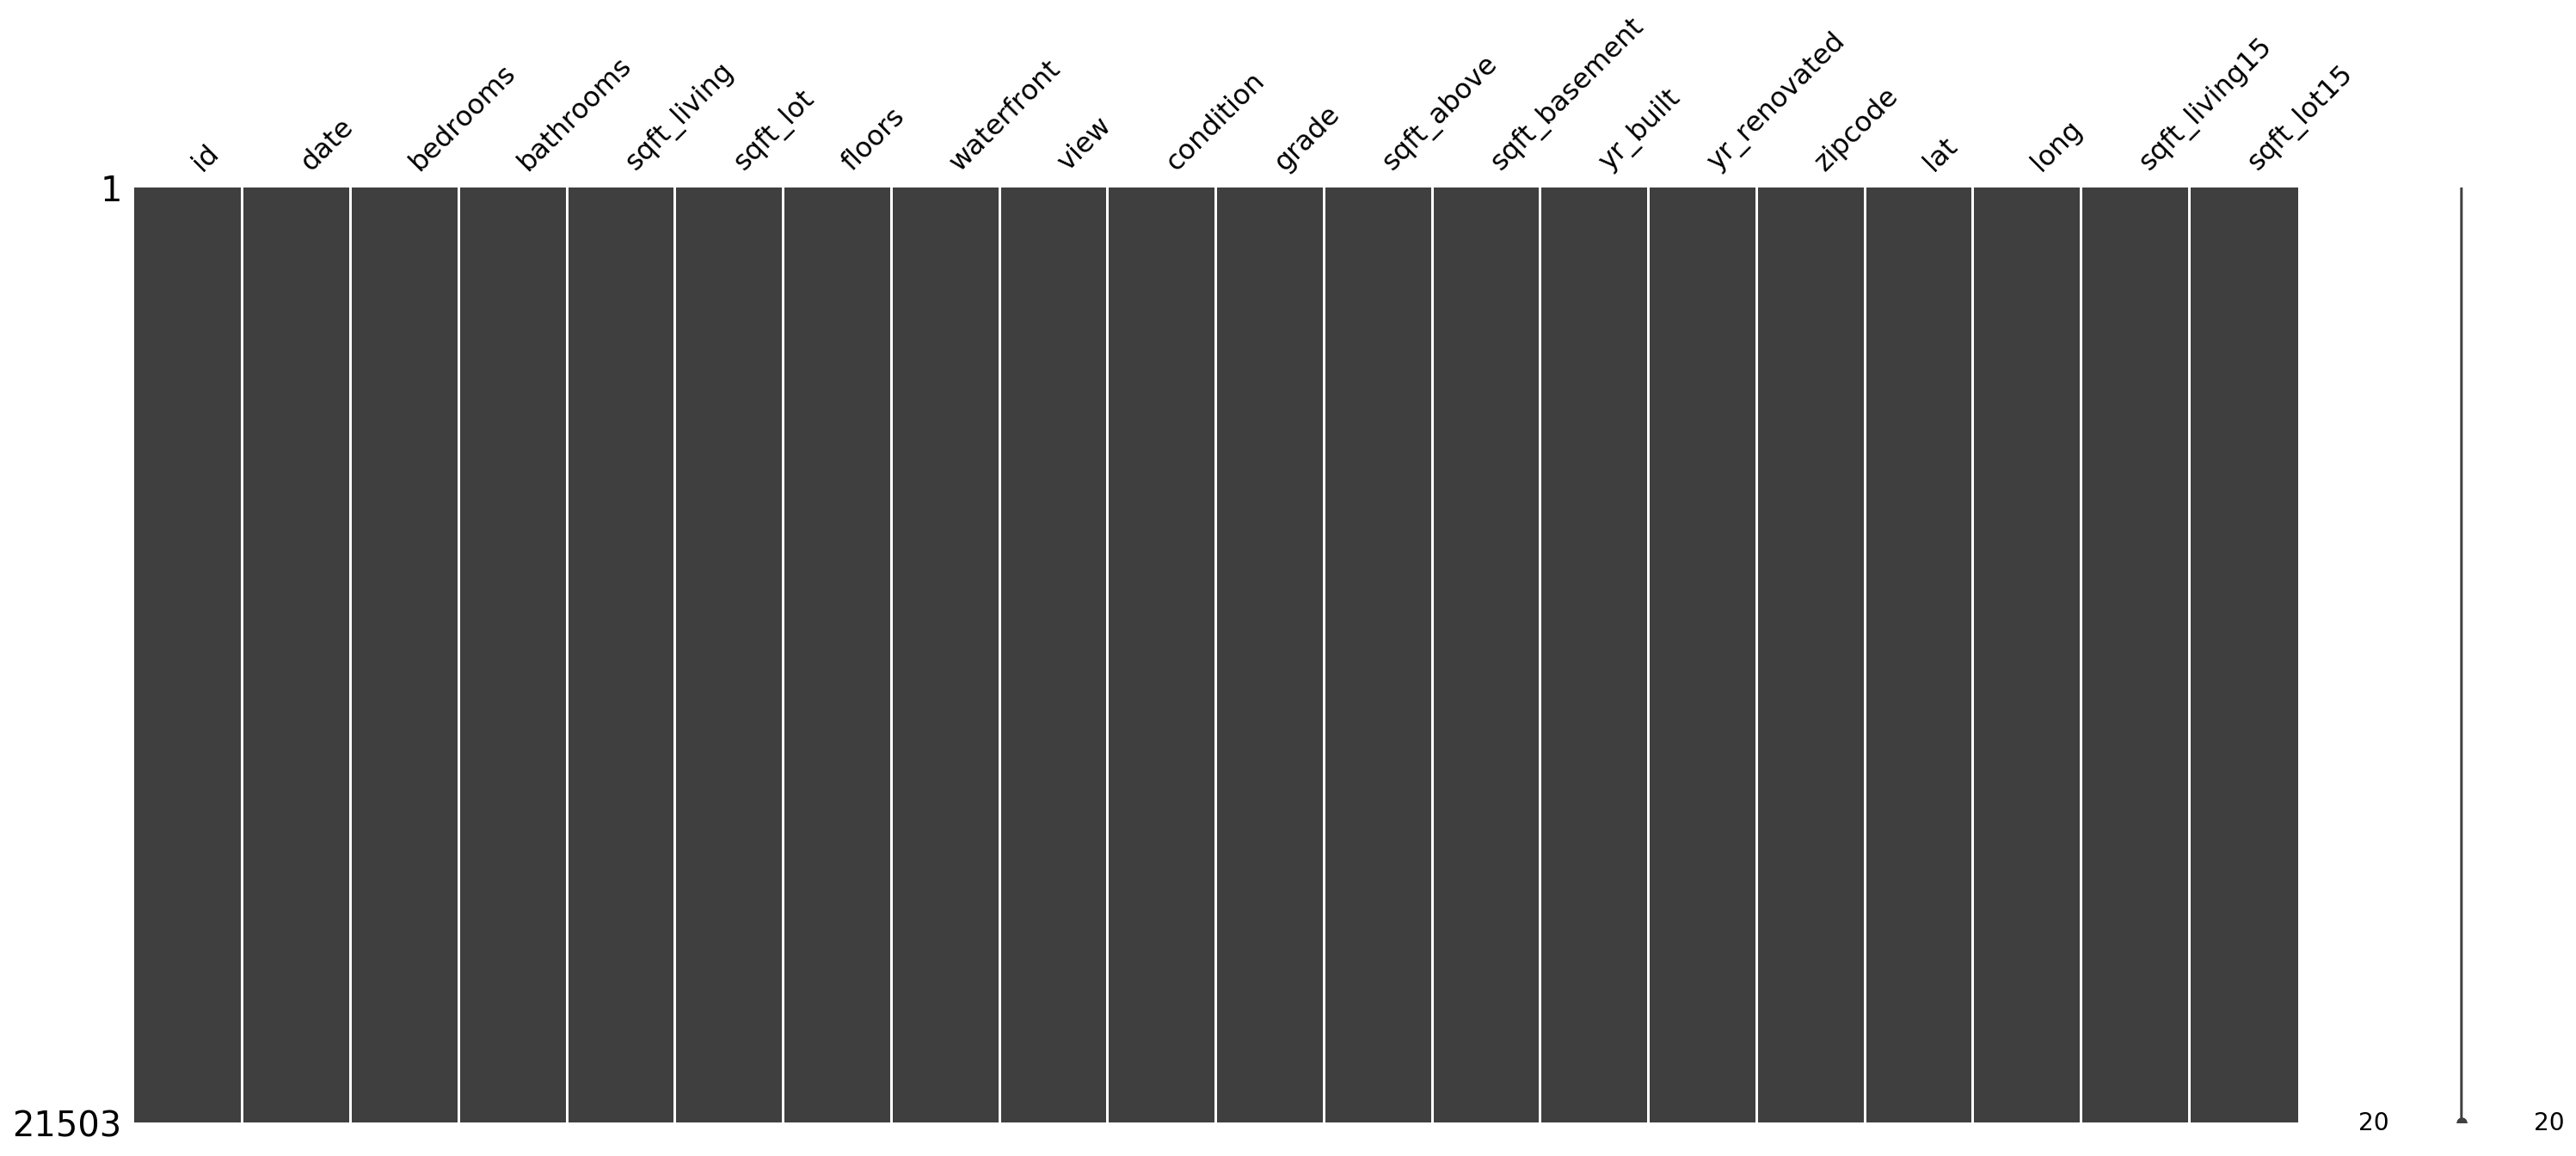

In [92]:
msno.matrix(data)

Î™®Îì† Î≥ÄÏàòÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå, ÌòπÏãú Î™®Î•¥Îãà ÌôïÏã§ÌïòÍ≤å ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.<br>

In [93]:
for c in data.columns:
#     print(f'{c} : { len( data.loc[ data[c].isnull(), c].values ) }')
    print(f'{c} : {data[c].isnull().sum()}')

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


# üïµÔ∏è‚Äç‚ôÇÔ∏èÎ≥ÄÏàò Ï≤òÎ¶¨

### id, date Î≥ÄÏàò Ï†ïÎ¶¨
id Î≥ÄÏàòÎäî Î™®Îç∏Ïù¥ ÏßëÍ∞íÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï£ºÏßÄ ÏïäÏúºÎØÄÎ°ú Ï†úÍ±∞Ìï©ÎãàÎã§.<br>
date Î≥ÄÏàòÎäî Ïó∞ÏõîÏùºÏãúÍ∞ÑÏúºÎ°ú Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÎç∞, Ïó∞ÏõîÎßå Í≥†Î†§ÌïòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÎßåÎì§Í≤†ÏäµÎãàÎã§.

 - Ï∞∏Í≥†ÏûêÎ£å: [Pandas Lambda, applyÎ•º ÌôúÏö©ÌïòÏó¨ Î≥µÏû°Ìïú Î°úÏßÅ Ï†ÅÏö©ÌïòÍ∏∞](https://data-newbie.tistory.com/207)

In [94]:
#test dataÏóêÏÑúÎäî ÏûÖÎ†•ÏúºÎ°ú Ïì∞ÏûÑ! ÎÇ®Í∏∞Í∏∞!
test_id = data['id'][train_len:]
del data['id']

In [95]:
len(test_id)

6468

In [96]:
data['date'] = data['date'].map(lambda x : str(x[:6]))
data['date'] = pd.to_datetime(data['date'], format='%Y%m')
data['year'] = data['date'].dt.year # intÌòï
data['month'] = data['date'].dt.month # intÌòï
# data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(str)
del data['date']

### Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏ Î∞è Î≥ÄÏàòÎ≥ÄÌôò
ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Îäî Î™®Îç∏Ïù¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÍ∏∞Ïóê Ï¢ãÏßÄ ÏïäÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Îã§Îì¨Ïñ¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

In [82]:
print(data.columns)
len(data.columns)

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')


21

## XÏùò Î∂ÑÌè¨

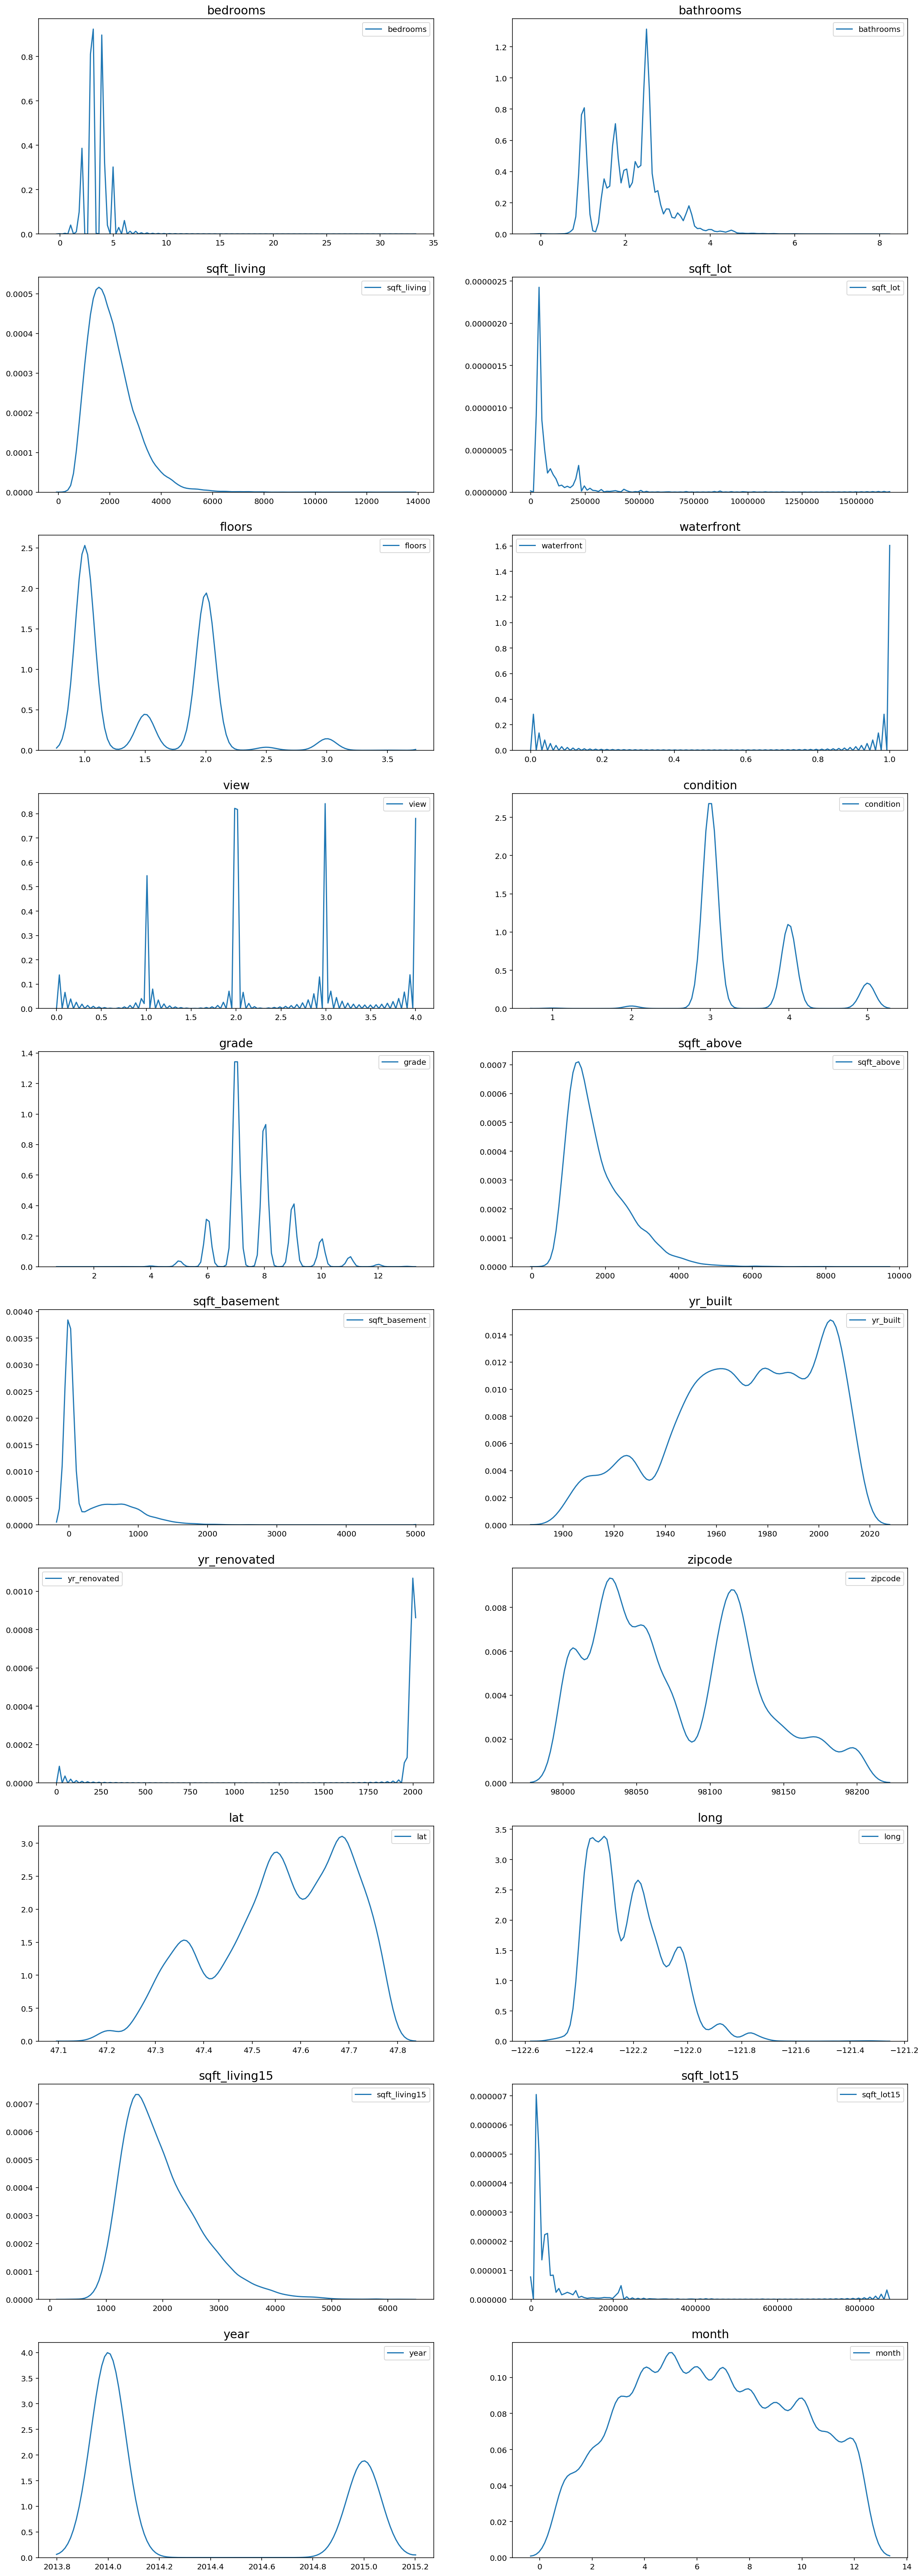

In [62]:
fig, axes = plt.subplots(10, 2, figsize = ( 20, 60))

# id Î≥ÄÏàòÎäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.

columns = data.columns
for idx, ax in enumerate(axes.flatten(), 1):
    if idx == len(columns) :
        break
    sns.kdeplot(data[columns[idx]], ax = ax)
    ax.set_title(columns[idx], fontsize = 15)
    
# count = 0
# for row in range(11):
#     for col in range(2):
#         sns.kdeplot(data[columns[count]], ax=ax[row][col])
#         ax[row][col].set_title(columns[count], fontsize=15)
#         count+=1
#         if count == 19 :
#             break

## yÏùò Î∂ÑÌè¨

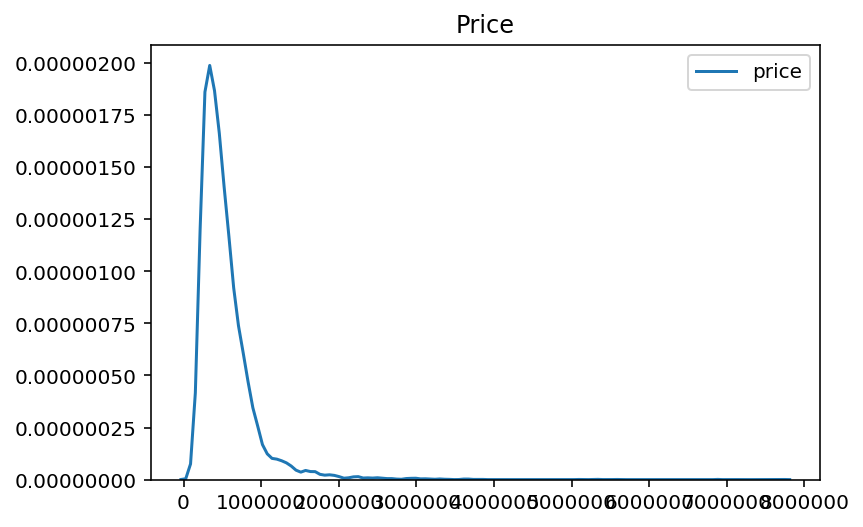

In [63]:
sns.kdeplot(train_y)
plt.title('Price')
plt.show()

- `price`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement` Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•
  - `bedrooms` ÏùÄ ÏïàÏπòÏö∞Ï≥§ÎäîÎç∞ Ïôú ÏπòÏö∞Ï≥§Îã§Í≥† ÌïúÍ±∞ÏßÄ ?
- log-scalingÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

- `numpy.log1p()` Ìï®ÏàòÎäî ÏûÖÎ†• Î∞∞Ïó¥Ïùò Í∞Å ÏöîÏÜåÏóê ÎåÄÌï¥ ÏûêÏó∞Î°úÍ∑∏ `log(1 + x)`ÏùÑ Î∞òÌôòÌï¥ Ï£ºÎäî Ìï®Ïàò
  - ÏûêÎ£åÏùò Î≤îÏúÑÍ∞Ä >= 0 Ïùº Í≤ΩÏö∞Ïóê ÏùåÏàòÍ∞íÏù¥ ÏóÜÎèÑÎ°ù ÎßåÎì§Ïñ¥ Ï£ºÎäî Î°úÍ∑∏Î≥ÄÌôò!

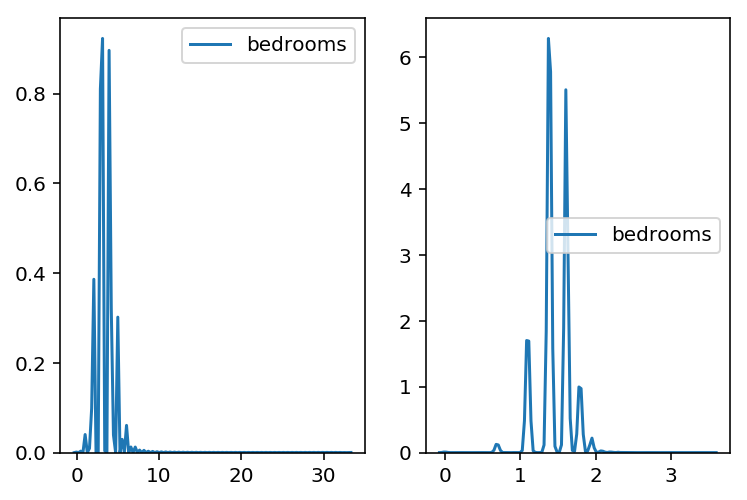

In [64]:
#temp: Îî±Ìûà Í∏∞Ïö∏Ïñ¥ÏßÑ Í≤ÉÎèÑ, Í∏∞Ïö∏Ïñ¥ÏßÑÍ≤å Í∞úÏÑ†ÎêòÏßÄÎèÑ ÏïäÏùå
temp = data['bedrooms']
temp_log = np.log1p(data['bedrooms'])

fig, axes = plt.subplots(1,2)
sns.kdeplot(temp, ax = axes[0])
sns.kdeplot(temp_log, ax = axes[1])

## Î≥ÄÏàòÎ≥ÄÌôò of train_X, train_y
 - ÏÑ±Îä•Ìñ•ÏÉÅÏùÑ ÏúÑÌï¥ ÏàòÌñâÌï¥Ï£ºÏßÄ ÏïäÏùå
 - [Trouble] Ïôú log1pÎ•º ÏàòÌñâÌïòÏßÄ ÏïäÏúºÎ©¥ ScoreÍ∞Ä Ï¢ãÏïÑÏßàÍπå ?
   - log Î≥ÄÌôòÏù¥ Ïôú ÌïÑÏöîÌñàÎäîÏßÄÏóê ÎåÄÌïú Ïù¥Ïú†Î•º Î®ºÏ†Ä Í≥†ÎØºÌï¥ Î¥êÏïº ÌïúÎã§.
   - ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò ÏûÖÎ†•Î≥ÄÏàòÏùò skewnessÎ•º Ï§ÑÏù¥Î†§Îäî Ïù¥Ïú†Í∞Ä Î≠òÍπå? ÏïÑÏßÅ ÏïåÏßÄ Î™ªÌïúÎã§.

In [65]:
# skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# for c in skew_columns:
#     data[c] = np.log1p(data[c].values)

In [19]:
# train_y = np.log1p(train_y)
# sns.kdeplot(train_y)
# plt.show()

Î≥ÄÌôò ÌõÑ ÌôïÏù∏: Ïñ¥ÎäêÏ†ïÎèÑ ÏπòÏö∞Ïπ®Ïù¥ Ï§ÑÏñ¥Îì† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

- Ïôú Î°úÍ∑∏ Î≥ÄÌôòÏùÄ Î∂ÑÌè¨Ïùò ÏπòÏö∞Ïπ®ÏùÑ Ï§ÑÏñ¥Îì§Í≤å ÎßåÎìúÎäî Í±∏Íπå?
  - logÎäî 0 ~ 1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÄ ÌéºÏ≥êÏ£ºÍ≥†, ÏïÑÏ£º ÌÅ∞ Í∞íÏùÄ Î™®ÏïÑÏ§ÄÎã§!
    - 0 ~ 1 ÏÇ¨Ïù¥Ïóê Í∞íÏù¥ ÎßéÏïÑÏÑú ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Îäî ÏπòÏö∞Ïπ®Ïù¥ Ï§ÑÏñ¥Îì§Í≤å ÎêúÎã§
    - ÏïÑÏ£º ÌÅ∞ Í∞íÏóê Í∞íÏù¥ ÎßéÏïÑÏÑú skewed to rightÎ∂ÑÌè¨Îäî Íº¨Î¶¨Í∞Ä Ï§ÑÏñ¥Îì§Í≤å ÎêúÎã§

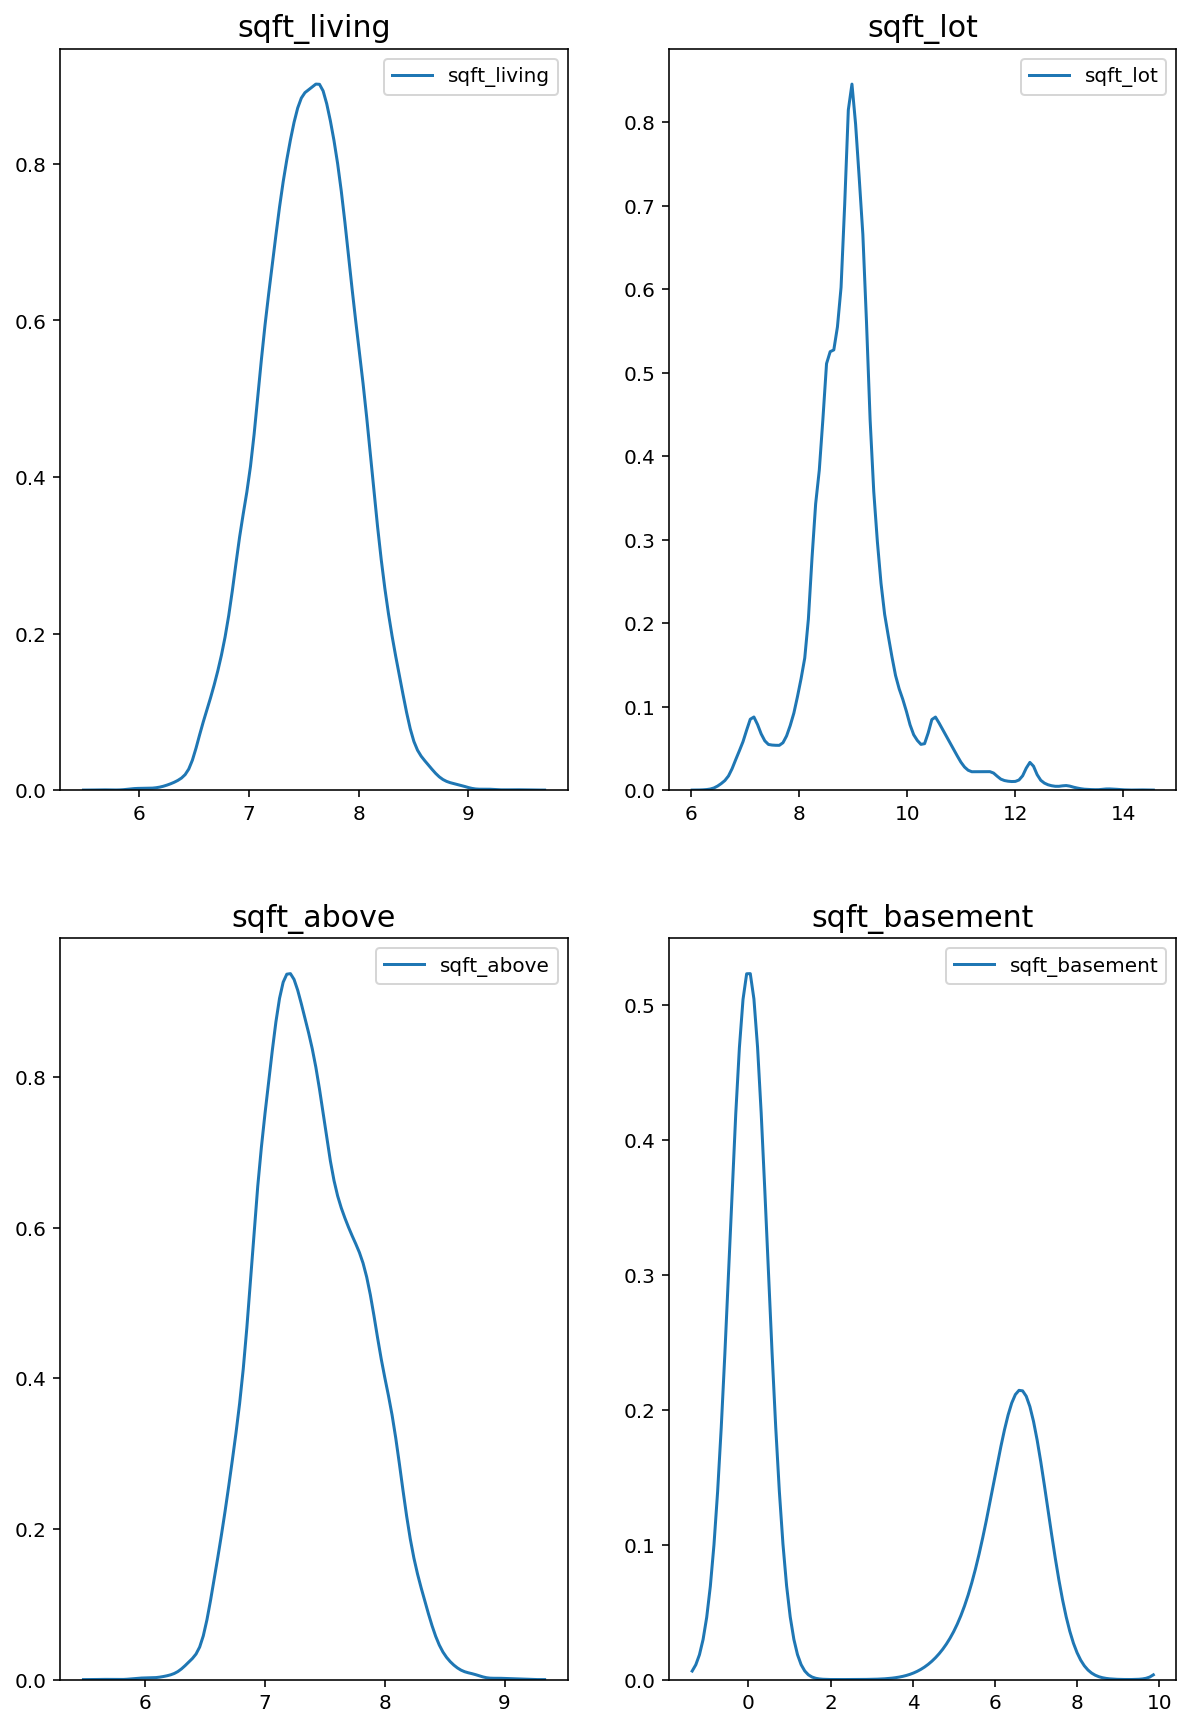

In [20]:
# fig, axes = plt.subplots(2, 2, figsize=(10, 15))

# for idx, ax in enumerate(axes.flatten()):
#     if idx == len(skew_columns):
#             break
#     sns.kdeplot(data[skew_columns[idx]], ax=ax)
#     ax.set_title(skew_columns[idx], fontsize=15)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 21 columns):
date             21503 non-null datetime64[ns]
bedrooms         21503 non-null int64
bathrooms        21503 non-null float64
sqft_living      21503 non-null float64
sqft_lot         21503 non-null float64
floors           21503 non-null float64
waterfront       21503 non-null int64
view             21503 non-null int64
condition        21503 non-null int64
grade            21503 non-null int64
sqft_above       21503 non-null float64
sqft_basement    21503 non-null float64
yr_built         21503 non-null int64
yr_renovated     21503 non-null int64
zipcode          21503 non-null int64
lat              21503 non-null float64
long             21503 non-null float64
sqft_living15    21503 non-null int64
sqft_lot15       21503 non-null int64
year             21503 non-null int64
month            21503 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(12)
memory usage: 3.6 MB

## Í∏∞ÌÉÄ ÌäπÏÑ± Í≥µÌïô

In [23]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [97]:
data['zip_1'] = data['zipcode'].apply(lambda x : str(x)[2]).astype(int)
data['zip_12'] = data['zipcode'].apply(lambda x : str(x)[2:4]).astype(int)
data['zip_2'] = data['zipcode'].apply(lambda x : str(x)[3]).astype(int)
data['zip_23'] = data['zipcode'].apply(lambda x : str(x)[3:5]).astype(int)
data['zip_3'] = data['zipcode'].apply(lambda x : str(x)[4]).astype(int)

le = LabelEncoder()
le.fit(data['zipcode'])

data['zipcode'] = le.transform(data['zipcode'])

In [98]:
data['sqft_total_size'] = data['sqft_above'] + data['sqft_basement'] # Ï¥ù Ï£ºÍ±∞ Î©¥Ï†Å    

In [99]:
train_X = data.iloc[:train_len, :]
test_X = data.iloc[train_len:, :]

 - Ï£ºÎ≥Ä ÏãúÏÑ∏Î•º Í≥†Î†§Ìï¥Î≥¥Ïûê!

In [100]:
####### zipcode_groupby Îã®Í∞Ä Î≥ÄÏàò ÏÉùÏÑ±
train_X['price_per_land_area'] = train_y / (train_X['sqft_living'])
price_per_ft = train_X.groupby(['zipcode'])['price_per_land_area'].agg({'mean', 'std', 'count'}).reset_index()
train_X = pd.merge(train_X, price_per_ft, how='left', on='zipcode')
test_X = pd.merge(test_X, price_per_ft, how='left', on='zipcode')
del train_X['price_per_land_area']

In [70]:
# train_y = np.log1p(train_y)

In [87]:
print(train_X.info())
print(train_X.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15035 entries, 0 to 15034
Data columns (total 30 columns):
id                 15035 non-null int64
bedrooms           15035 non-null int64
bathrooms          15035 non-null float64
sqft_living        15035 non-null int64
sqft_lot           15035 non-null int64
floors             15035 non-null float64
waterfront         15035 non-null int64
view               15035 non-null int64
condition          15035 non-null int64
grade              15035 non-null int64
sqft_above         15035 non-null int64
sqft_basement      15035 non-null int64
yr_built           15035 non-null int64
yr_renovated       15035 non-null int64
zipcode            15035 non-null int64
lat                15035 non-null float64
long               15035 non-null float64
sqft_living15      15035 non-null int64
sqft_lot15         15035 non-null int64
year               15035 non-null int64
month              15035 non-null int64
zip_1              15035 non-null int64
zip

# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±: train(x), test

In [101]:
train_X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'zip_1', 'zip_12',
       'zip_2', 'zip_23', 'zip_3', 'sqft_total_size', 'count', 'mean', 'std'],
      dtype='object')

In [102]:
# data = x['date']
train_X = train_X[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'zip_1', 'zip_12',
       'zip_2', 'zip_23', 'zip_3', 'sqft_total_size', 'count', 'mean', 'std']]
test_X = test_X[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'zip_1', 'zip_12',
       'zip_2', 'zip_23', 'zip_3', 'sqft_total_size', 'count', 'mean', 'std']]

# üìò BASELINE ÏÑ§Ï†ïÌé∏

## 1. Î™®Îç∏ÎßÅ
### Average Blending
Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà† ÌèâÍ∑†ÏùÑ ÌÜµÌï¥ Blending Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.
- Ensemble, Blending Î™®Îç∏
  - Voting: Îã§ÏàòÍ≤∞ Ìà¨Ìëú, Î∂ÑÎ•òÎ¨∏Ï†ú
  - Averaging, Bagging: ÏÇ∞Ïà†/Í∞ÄÏ§ë ÌèâÍ∑†, ÌöåÍ∑ÄÎ¨∏Ï†ú
- Ï∞∏Í≥†ÏûêÎ£å
  - [ÏàòÎπÑÎãàÏõÄ-Part 1. Introduction to Ensemble Learning](https://subinium.github.io/introduction-to-ensemble-1/#:~:text=%EC%95%99%EC%83%81%EB%B8%94(Ensemble)%20%ED%95%99%EC%8A%B5%EC%9D%80%20%EC%97%AC%EB%9F%AC,%EB%A5%BC%20%EA%B0%80%EC%A7%80%EA%B3%A0%20%EC%9D%B4%ED%95%B4%ED%95%98%EB%A9%B4%20%EC%A2%8B%EC%8A%B5%EB%8B%88%EB%8B%A4)
  - [kaggle ensemble guide[Ìïú]](https://gentlej90.tistory.com/73)
    - Ïôú Ïó¨Îü¨Í∞úÏùò Î™®Îç∏Ïù¥ Îçî Ï¢ãÏùÄÍ∞Ä ? X ~ B(n, p = 0.7)Î•º Îñ†Ïò¨Î†§Î≥¥Ïûê!
  - [kaggle ensemble guide[ÏòÅ]](https://mlwave.com/kaggle-ensembling-guide/?lipi=urn%3Ali%3Apage%3Ad_flagship3_pulse_read%3BPZ4T3JLHTu%2BOWNI0d5kFbg%3D%3D)

### Boosting Î™®Îç∏Ïùò Blending

In [32]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)
#‚òÖÏÇ¨Ïö©Ìï† Î™®Îç∏Í≥º Î™®Îç∏Î™ÖÏùÑ Í∞ÄÏßÑ ÎîïÏÖîÎÑàÎ¶¨Ïùò Î¶¨Ïä§Ìä∏!!
models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

### Cross Validation
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

- def cross_val_score(...)
  - Returns R¬≤ when model is Regression
  - Ï∞∏Í≥†ÏûêÎ£å: [Í≤∞Ï†ïÍ≥ÑÏàò R¬≤](https://newsight.tistory.com/259)

In [33]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(train_X.values)
    for m in models:
        print(f"Model {m['name']} \
        CV score : {np.mean(cross_val_score(m['model'], train_X.values, train_y, cv = kfold)):.4f}")

In [34]:
get_cv_score(models)

Model GradientBoosting         CV score : 0.8900
Model XGBoost         CV score : 0.8895
Model LightGBM         CV score : 0.9036


### Make Submission

In [35]:
def AveragingBlending(models, train_X, train_y, test_X):
    for m in models : 
        m['model'].fit(train_X.values, train_y)
    
    predictions = np.column_stack([m['model'].predict(test_X.values) for m in models])
    return np.mean(predictions, axis=1)

In [36]:
y_pred = AveragingBlending(models, train_X, train_y, test_X)

- [Trouble] Kaggle Ïò§Î•ò Îç∞Ïù¥ÌÑ∞
  - Kaggle ÏÉÅÏóê Ïò¨ÎùºÏôÄ ÏûàÎäî dataÎäî testÏôÄ submission_sampleÏùò idÍ∞Ä ÏÑúÎ°ú Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Ïù¥Îã§. Ìñ•ÌõÑ testÏôÄ sample_submissionÏùò sanity checkÏùò ÌïÑÏöîÏÑ±ÏùÑ ÎäêÎÇå
    - train id : 0 ~ 15034
    - sample_submission : 15035 ~ 21502
    - test id : 15208 ~ 21762
  - LMSÏùò Îç∞Ïù¥ÌÑ∞Î•º KaggleÏóêÏÑú Îã§Ïãú Í≤ÄÏÉâÌï¥ [Ïò≥ÏùÄ ÏûêÎ£å](https://www.kaggle.com/cookierhkwk/2019-2nd-ml-month-with-kakr?select=test.csv)Î•º Ï∞æÏïòÏùå

In [37]:
# sub = pd.DataFrame(data={'id':test_id,'price':y_pred})

# sub.columns

#sub = pd.merge(sub[['id']], test, how = 'left', on = 'id')

# sub.to_csv('submission.csv', index=False)z

# Î≤†Ïù¥Ïä§ÎùºÏù∏ÏùÑ ÏÑ§Ï†ïÌïòÏòÄÎã§.
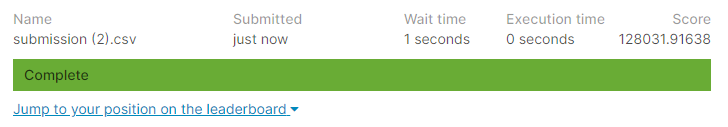

# üìï Ïã§Ï†ÑÌé∏ 
## üë®‚Äçüè´ÏÑ±Îä•ÏùÑ Í∞úÏÑ†Ìï¥Î≥¥Ïûê!

- ÏÑ±Îä•Ìñ•ÏÉÅ ÏöîÍ±¥
  - EDA
  - Îã§ÏñëÌïú Î™®Îç∏ ÏãúÎèÑÌïòÍ∏∞(LGBMRegressor, XGBRegressor, RandomForestRegressor, ... )
  - ÌååÏù∏ ÌäúÎãù
    - lightgbm
      - `max_depth` : ÏùòÏÇ¨ Í≤∞Ï†ï ÎÇòÎ¨¥Ïùò ÍπäÏù¥, Ï†ïÏàò ÏÇ¨Ïö©
      - `learning_rate` : Ìïú Ïä§ÌÖùÏóê Ïù¥ÎèôÌïòÎäî ÏñëÏùÑ Í≤∞Ï†ïÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞, Î≥¥ÌÜµ 0.0001~0.1 ÏÇ¨Ïù¥Ïùò Ïã§Ïàò ÏÇ¨Ïö©
      - `n_estimators` : ÏÇ¨Ïö©ÌïòÎäî Í∞úÎ≥Ñ Î™®Îç∏Ïùò Í∞úÏàò, Î≥¥ÌÜµ 50~100 Ïù¥ÏÉÅÏùò Ï†ïÏàò ÏÇ¨Ïö©
      - `num_leaves` : ÌïòÎÇòÏùò LightGBM Ìä∏Î¶¨Í∞Ä Í∞ÄÏßà Ïàò ÏûàÎäî ÏµúÎåÄ ÏûéÏùò Ïàò
      - `boosting_type` : Î∂ÄÏä§ÌåÖ Î∞©Ïãù, gbdt, rf Îì±Ïùò Î¨∏ÏûêÏó¥ ÏûÖÎ†•
     - Ï∞∏Í≥†ÏûêÎ£å: [[Chapter 4. Î∂ÑÎ•ò] LightGBM](https://injo.tistory.com/48), [lightGBM/XGBoost ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Î™Ö](http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/)
  - Blending

In [38]:
#Ï†ÑÏ≤òÎ¶¨ Î∞è ÌèâÍ∞Ä
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Î™®Îç∏
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

#ÌïòÏù¥Ìçº ÌååÎ¶¨ÎØ∏ÌÑ∞ ÌäúÎÑà
from sklearn.model_selection import GridSearchCV


In [39]:
#ÌèâÍ∞Ä Ïãú ÏõêÎûòÏùò ÌòïÌÉúÎ°ú Î≥ÄÌôò ÌõÑ Í≥ÑÏÇ∞Ìï¥Ïïº Ìï®
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
#     return np.sqrt(mean_squared_error(y_test, y_pred))

- Topic: Î™®Îç∏Í≥º random_state
  - ÌååÎùºÎØ∏ÌÑ∞ Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ± ÏñëÏÉÅÏùÑ Í≤∞Ï†ïÌïòÎäî ÏöîÏù∏ÏúºÎ°ú, Í≥†Ï†ïÌï¥Ï£ºÏßÄ ÏïäÏúºÎ©¥ Î®∏Ïã†Îü¨Îãù ÌïôÏäµÍ≤∞Í≥ºÍ∞Ä Îß§Î≤à Îã¨ÎùºÏßÄÍ≤å ÎêúÎã§.

# Grid Search

- Ï∞∏Í≥†ÏûêÎ£å
  - Scoring: [ÏÇ¨Ïù¥ÌÇ∑Îü∞ Scoring Parameters](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [41]:
"""
Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÎäî `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.

1. GridSearchCV Î™®Îç∏Î°ú `model`ÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ fitting Ìï©ÎãàÎã§.
3. params, scoreÏóê Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§. 
4. Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïú ÌõÑ Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìïú `results`Î•º Î∞òÌôòÌï©ÎãàÎã§.
"""

def my_GridSearch(model, train_X, train_y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # Î™®Îç∏ fitting
    grid_model.fit(train_X, train_y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    # where RMSLEÎäî Ï£ºÏñ¥ÏßÑ yÎ•º logÎ≥ÄÌôòÌïòÏó¨ Íµ¨Ìïú RMSEÍ∞í
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [42]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20]
}

# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.  
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

# for model in models :
#     print(model.__class__.__name__)
#     print(my_GridSearch(model, x, y, param_grid, verbose=2, n_jobs=5))

# #ForestÎäî learning rateÍ∞Ä ÏóÜÍ≥†,
# # GBR : 0.1 10 100
# # XGB : 0.1 10 200
# # LGB : 0.1 20 300 Ïù¥ Í∞ÄÏû• ÎÜíÏùå

- Í∞Å Î™®Îç∏Î≥ÑÎ°ú Îã§Ïùå ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ ÎÉÑÏùÑ Ïïå Ïàò ÏûàÏóàÎã§.
  - ForestÎäî learning rateÍ∞Ä ÏóÜÍ≥†,
  - GBR : 0.1 10 100
  - XGB : 0.1 10 200
  - LGB : 0.1 20 300 Ïù¥ Í∞ÄÏû• ÎÜíÏùå

# Ï†úÏ∂úÌï† Î™®Îç∏ ÏàòÌñâ

In [106]:
gboost = GradientBoostingRegressor(learning_rate = 0.1 ,max_depth = 10,n_estimators = 100,  random_state=random_state)
xgboost = XGBRegressor(learning_rate = 0.1, max_depth = 10,n_estimators = 200,random_state=random_state)
lightgbm = LGBMRegressor(learning_rate = 0.1, max_depth = 20,n_estimators = 300,random_state=random_state)
# rdforest = RandomForestRegressor(random_state=random_state)
# neighbors = neighbors.KNeighborsRegressor(n_jobs=-1, n_neighbors=4)

gboost.fit(train_X, train_y)
xgboost.fit(train_X, train_y)
lightgbm.fit(train_X, train_y)
# rdforest.fit(train_X, train_y)
# neighbors.fit(train_X, train_y)

# pred_gb = np.expm1(gboost.predict(test_X))
# pred_xgb = np.expm1(xgboost.predict(test_X))
# pred_lgb = np.expm1(lightgbm.predict(test_X))

pred_gb = gboost.predict(test_X)
pred_xgb = xgboost.predict(test_X)
pred_lgb = lightgbm.predict(test_X)
# pred_rdf = np.expm1(rdforest.predict(test_X))
# pred_nei = np.expm1(neighbors.predict(test_X))

In [107]:
# prediction = np.mean(np.column_stack([pred_gb, pred_xgb, pred_lgb]), axis = 1 )
prediction = 0.125*pred_gb + 0.5*pred_xgb + 0.375*pred_lgb

# model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
# model_name = model.__class__.__name__
# model.fit(x, y)
# prediction = np.expm1(model.predict(test))
# prediction

In [108]:
sub = pd.DataFrame(data = {'id':test_id, 'price':prediction})
sub.to_csv('./submission.csv', index = False)

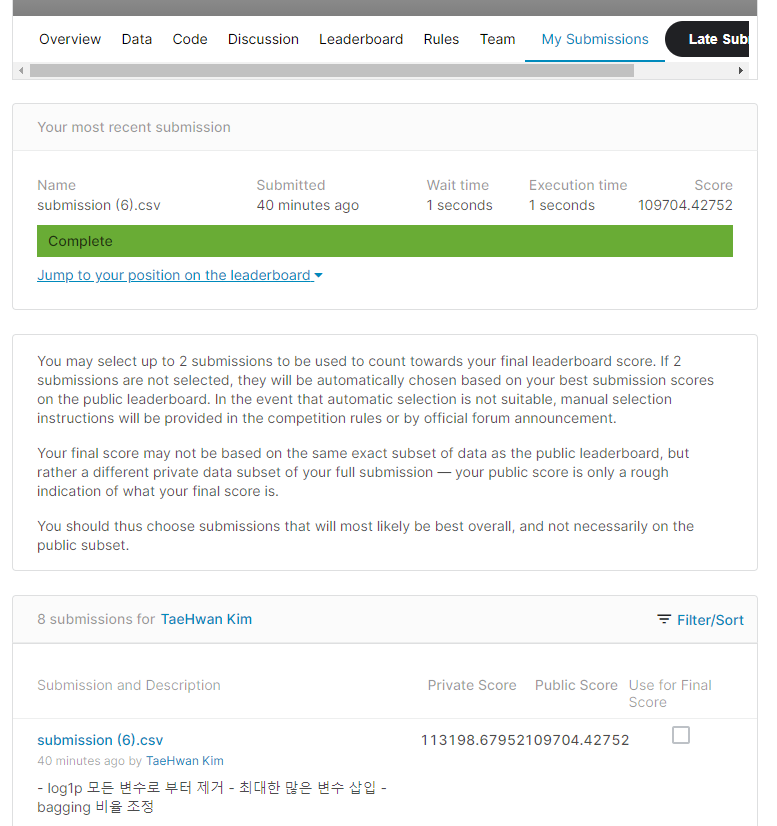

- **Î£®Î∏åÎ¶≠ Í∏∞Ï§Ä**ÏùÑ Ï∂©Ï°±ÌïòÏòÄÎã§!
  - Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨, Î™®Îç∏ÌïôÏäµ, ÏòàÏ∏°Ïùò Ï†ÑÏ≤¥ Í≥ºÏ†ïÏùÑ Í±∞Ï≥ê Ï∫êÍ∏Ä submissionÍπåÏßÄ Ï†ÑÍ≥ºÏ†ïÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎäîÍ∞Ä?
  - Ï†úÏ∂úÎêú ÎÖ∏Ìä∏Î∂ÅÏù¥ Ï∫êÍ∏Ä Ïª§ÎÑêÎ°ú ÏÇ¨Ïö©Îê† Ïàò ÏûàÏùÑ ÎßåÌÅº Ï†ÑÏ≤òÎ¶¨, ÌïôÏäµ, ÏµúÏ†ÅÌôî ÏßÑÌñâ Í≥ºÏ†ïÏù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Í∏∞Ïà†ÎêòÏóàÎäîÍ∞Ä?
  - Îã§ÏñëÌïú ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÍ≥º ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Îì±Ïùò ÏµúÏ†ÅÌôî Í∏∞Î≤ïÏùÑ ÌÜµÌï¥ Ï∫êÍ∏Ä Î¶¨ÎçîÎ≥¥ÎìúÏùò Private score Í∏∞Ï§Ä 110000 Ïù¥ÌïòÏùò Ï†êÏàòÎ•º ÏñªÏóàÎäîÍ∞Ä?

# ÌöåÍ≥†
 - Ìï¥Ïª§ÌÜ§Ïóê Ïù¥Ïñ¥ÏßÑ Ï∫êÍ∏Ä ÎÖ∏ÎìúÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ Ïó∞ÏäµÌïòÍ∏∞ Ï†ÅÌï©Ìïú Í≥ºÏ†úÏòÄÎã§.
 - Î®∏Ïã†Îü¨ÎãùÏùÑ ÏßÑÌñâÌï®Ïóê ÏûàÏñ¥ÏÑú Îã§ÏñëÌïú ÏÑ±Îä•Ìñ•ÏÉÅ ÏöîÍ±¥Ïù¥ ÏûàÏùåÏùÑ ÏïåÍ≤å ÎêòÏóàÍ≥†, Î™®Î∞©ÏùÑ ÌÜµÌï¥ ÌäπÏÑ±Í≥µÌïôÍ≥º ÌååÏù∏ÌäúÎãùÏóê ÎåÄÌïú Ïó¨Îü¨Í∞ÄÏßÄ ÏãúÎèÑÎ•º Ìï¥ Î≥º Ïàò ÏûàÏóàÎã§.
 
 - ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏßÅÍ¥ÄÏ†ÅÏù∏ Ïù¥Ìï¥ ÏóÜÏù¥ ÏàòÏπòÏ†ÅÏúºÎ°úÎßå Ï†ëÍ∑ºÌïòÍ≥†, Ïä§ÏΩîÏñ¥ÏóêÎßå Ïó∞Ïó∞Ìï¥ Í≤∞Í≥ºÎ•º ÌöçÎìùÌñàÎã§.
   - ÏòàÎ•º Îì§Ïñ¥, Î∂ÄÎèôÏÇ∞Ïùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïúÎã§Î©¥ Í∞ÄÏû• 1ÏàúÏúÑÎäî Ï£ºÎ≥ÄÏßÄÏó≠Ïùò ÏãúÏÑ∏Ïùº Í≤ÉÏù¥Îã§.(Í≥µÏãúÏßÄÍ∞ÄÎèÑ Ïù¥ÏôÄÍ∞ôÏù¥ Ï±ÖÏ†ïÌïúÎã§) ÎãπÏó∞Ìûà ÌèâÎãπ Îã®Í∞ÄÎ•º Î≥ÄÌôòÌïòÎäî Î∂ÑÏÑùÏùÑ ÌïòÏòÄÏñ¥Ïïº ÌïòÎÇò Îã§Î•∏ Ïª§ÎÑêÏùÑ Ï∞∏Í≥† ÌïòÍ∏∞ Ï†ÑÍπåÏßÄÎäî Îñ†Ïò¨Î¶¨ÏßÄ Î™ªÌïòÏòÄÎã§. Í∑∏Î¶¨Í≥† Ïù¥Ïñ¥ÏßÄÎäî ÏàúÏúÑÏóê ÏúÑÏπò, Î∑∞(ÌïúÍ∞ï Î∑∞, Î∞îÎã§ Î∑∞), ÏßëÏùò ÌÅ¨Í∏∞ Îì±Ïù¥ ÏûàÏùÑ Í≤ÉÏù¥Îã§. Ïù¥Ï≤òÎüº Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÉÅÏãùÏ†ÅÏù∏ Ïù¥Ìï¥Î•º ÌÜ†ÎåÄÎ°ú Î∂ÑÏÑùÌï¥Ïïº Ìï®ÏùÑ ÎäêÍºàÎã§.
 - ÎòêÌïú Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïóê ÌïôÏäµÏãúÌÇ¨Îïå ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÄÎäî ÌñâÏúÑÏóê ÎåÄÌïú Ïù¥Ìï¥Í∞Ä Î∂ÄÏ°±Ìïú Ï±Ñ Í≥ºÏ†úÎ•º ÏßÑÌñâÌñàÎã§. Í∏∞Î≥∏Ï†ÅÏù∏ Îã§Ìï≠ ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏÉùÍ∞ÅÌï¥Î≥¥Î©¥, ÎÑàÎ¨¥ ÎßéÏùÄ Î≥ÄÏàòÏùò ÏûÖÎ†•ÏùÄ **Îã§Ï§ëÍ≥µÏÑ†ÏÑ±** Î¨∏Ï†úÎ°ú **Ï°∞Í±¥Ïàò**Ïùò ÌÅ¨Í∏∞Î•º ÌÇ§Ïö∏ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§. Îî∞ÎùºÏÑú Î∂àÌïÑÏöîÌïú Î≥ÄÏàòÎ•º ÏÇ≠Ï†úÌïòÎäî Í≥ºÏ†ïÏù¥ ÌïÑÏöîÌïòÎã§. Í∑∏Îü∞Îç∞ Ïù¥ Í≥ºÏ†úÎ•º ÏßÑÌñâÌïòÎ©¥ÏÑú Ïù¥Îü¨Ìïú Í≥†Î†§ ÏóÜÏù¥ ÏµúÎåÄÌïú ÎßéÏùÄ Î≥ÄÏàòÎ•º ÎÑ£Ïñ¥ ÏÑ±Îä•ÏùÑ ÎÜíÌòîÎã§. Îã§ÌñâÌûà test Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÏÑ§Î™ÖÌñàÏúºÎÇò, ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í≥ºÏ†ÅÌï©ÏúºÎ°ú Ïù∏Ìï¥ testÎç∞Ïù¥ÌÑ∞Î•º Ïûò ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ∞ Î∞©ÏãùÏù¥ÏóàÎã§. 
 - ÏúÑÏùò Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÉÅÏãùÏ†ÅÏù∏ Ïù¥Ìï¥ÏôÄ Î™®Îç∏Ïùò ÌïôÏäµÎ∞©ÏãùÏùÑ Ïù¥Ìï¥ÌïòÍ≥† Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Îã§ÏñëÌïú Ï†ëÍ∑ºÍ≥º Î™®Îç∏Ïùò Ï≤¥Í≥ÑÏ†ÅÏù∏ ÌïôÏäµÏù¥ ÌïÑÏöîÌï®ÏùÑ Îòê ÌïúÎ≤à Ï†àÏã§Ìûà ÎäêÍºàÎã§.
   > - Î∂ÄÎèôÏÇ∞ Î¨∏Ï†úÍ∞Ä ÎÇòÏò§Î©¥, Î∂ÄÎèôÏÇ∞Ïóê ÎåÄÌïú ÏÉÅÏãùÏùÑ Í∞ñÍ≥† Ï†ëÍ∑ºÌïòÏûê.
   > - **ÌöåÍ∑ÄÎ∂ÑÏÑù**ÏùÑ Î®ºÏ†Ä Í≥µÎ∂ÄÌïòÏûê. ÏÑ†ÌòïÎåÄÏàòÌïôÏóêÏÑú **Ï°∞Í±¥Ïàò**Ïóê ÎåÄÌï¥ Í≥µÎ∂ÄÌïòÏûê. 
 - Ïù¥Îü∞ÏãùÏúºÎ°ú ÌïÑÏöîÏÑ±ÏùÑ ÎäêÎÅºÎäî Í≤ÉÏù¥ ÌïôÏäµÏóê ÎåÄÌïú Îòê Îã§Î•∏ ÎèôÍ∏∞Í∞Ä ÎêòÎäî Í≤ÉÏù¥ Ï¶êÍ≤ÅÎã§.
